In [1]:
#!pip install --upgrade opentsne

## MNIST dataset

In [2]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# label_dict = {
#     0: 'T-shirt/top',
#     1: 'Trouser',
#     2: 'Pullover',
#     3: 'Dress',
#     4: 'Coat',
#     5: 'Sandal',
#     6: 'Shirt',
#     7: 'Sneaker',
#     8: 'Bag',
#     9: 'Ankle boot'
# }

tr = pd.read_csv('mnist_train.csv')#.sample(20000, random_state=911).reset_index(drop=True)
tst = pd.read_csv('mnist_test.csv')#.sample(5000, random_state=911).reset_index(drop=True)
# tr['label_str'] = tr.label.map(label_dict).astype('category')
# tst['label_str'] = tst.label.map(label_dict).astype('category')

tr.info()
tr.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  

[3 rows x 785 columns]

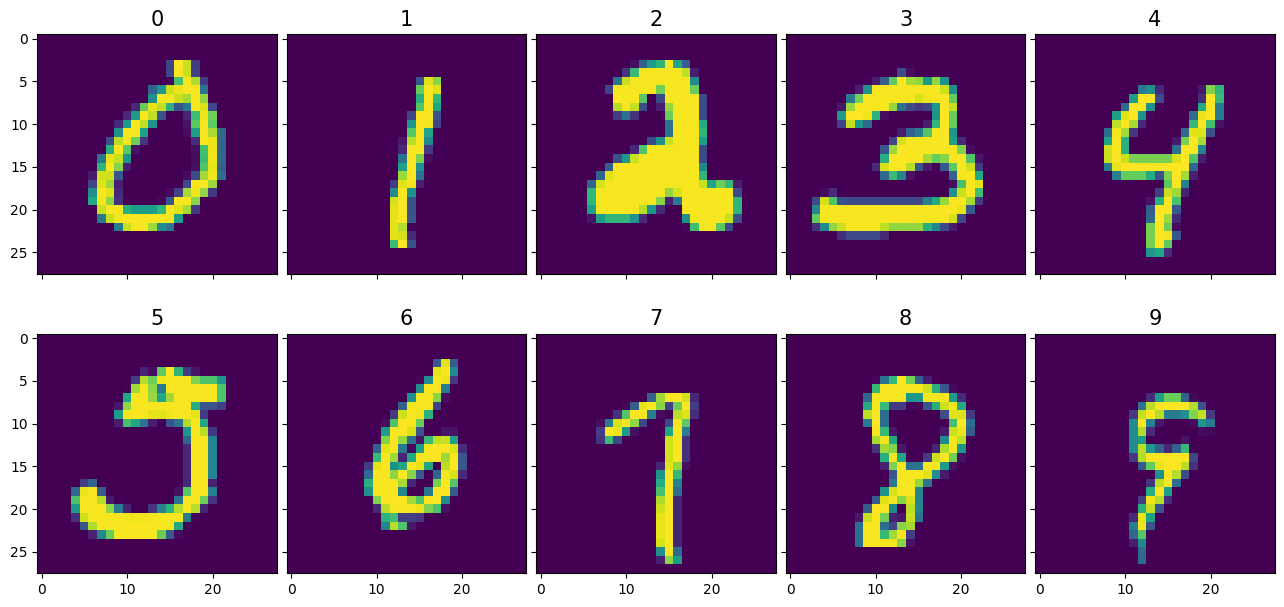

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def plot_img(X, idx, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    ax.set_title(X.loc[idx, 'label'], fontsize=15)
    ax.imshow(X.iloc[idx, 1:].values.astype(np.int32).reshape(28, 28))

fig = plt.figure(figsize=(20., 7))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=(0.1, 0.6))

class_examples = tr.groupby('label', observed=True).sample(1, random_state=911)
images, labels = class_examples.iloc[:, 1:].values.astype(np.int32), class_examples.label

for i, (ax, im) in enumerate(zip(grid, images)):
    ax.set_title(labels.iloc[i], fontsize=15)
    ax.imshow(im.reshape(28, 28))

In [4]:
X_tr, y_tr, X_tst, y_tst = tr.iloc[:, 1:].values.astype(np.int64), tr.label.values, \
                            tst.iloc[:, 1:].values.astype(np.int64), tst.label.values

print('tr shape:', X_tr.shape, 'val shape:', X_tst.shape)

tr shape: (60000, 784) val shape: (10000, 784)


# t-SNE

библиотека: [openTSNE](https://github.com/pavlin-policar/openTSNE)

## 1. Hello world usage

In [5]:
%%time
from openTSNE import TSNE

embedding = TSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration_iter=250,
    early_exaggeration=12,
    n_iter=500,
    exaggeration=4,
    initialization='pca',
    neighbors='hnsw',
    metric='cosine',
    n_jobs=-1,
    verbose=True
).fit(X_tr)
embedding

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=4, metric='cosine', n_jobs=-1,
     neighbors='hnsw', verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using HNSWlib approximate search using cosine distance...
   --> Time elapsed: 14.82 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.30 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.43 seconds
===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 5.8057, 50 iterations in 1.6704 sec
Iteration  100, KL divergence 5.5787, 50 iterations in 1.6784 sec
Iteration  150, KL divergence 5.5136, 50 iterations in 1.6844 sec
Iteration  200, KL divergence 5.4896, 50 iterations in 1.6116 sec
Iteration  250, KL divergence 5.4782, 50 iterations in 1.6206 sec
   --> Time elapsed: 8.27 seconds
===> 

TSNEEmbedding([[  5.66058888,  -0.46126855],
               [ 11.86379715,   9.43600597],
               [ -1.10251019, -14.57557953],
               ...,
               [  5.27478794,  -0.8282486 ],
               [ 13.01455183,  -1.4337539 ],
               [ -3.97751615,   1.21773084]])

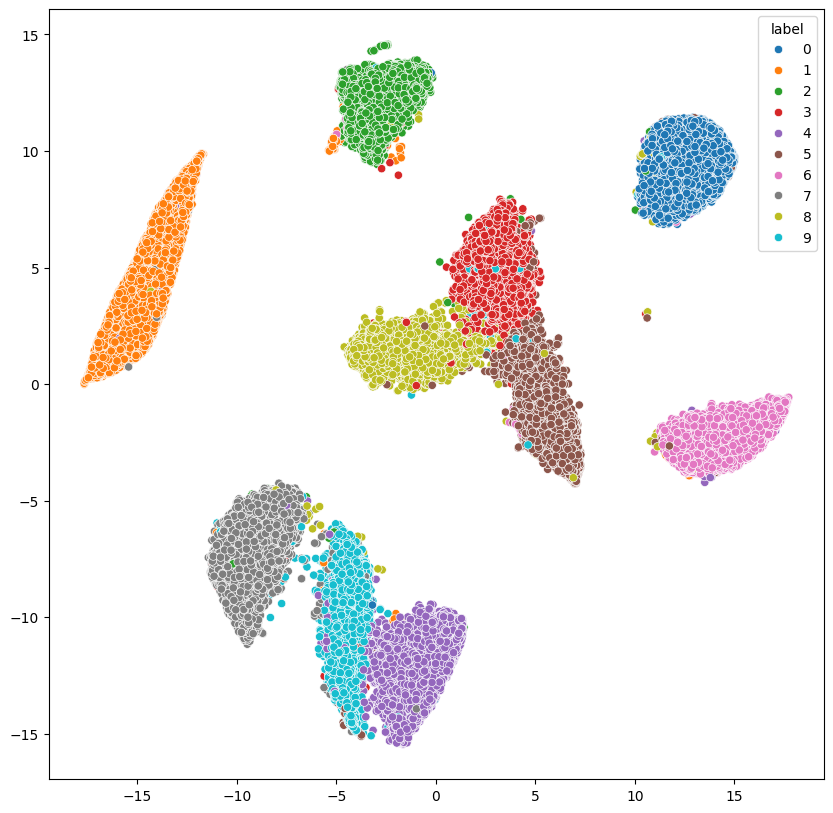

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr.label.astype(str),
                hue_order=np.unique(tr.label).astype(str))
plt.gcf().set_size_inches(10, 10)
plt.show()

### .transform(new_data)

[статья](https://link.springer.com/article/10.1007/s10994-021-06043-1)

In [7]:
%%time
tst_embedding = embedding.transform(X_tst, early_exaggeration_iter=100)

===> Finding 15 nearest neighbors in existing embedding using HNSWlib approximate search...
   --> Time elapsed: 0.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 100 iterations...
Iteration   50, KL divergence 168064.2445, 50 iterations in 0.1365 sec
Iteration  100, KL divergence 168013.5295, 50 iterations in 0.1435 sec
   --> Time elapsed: 0.28 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 158080.8008, 50 iterations in 0.1306 sec
Iteration  100, KL divergence 158062.7690, 50 iterations in 0.1355 sec
Iteration  150, KL divergence 158048.8916, 50 iterations in 0.1385 sec
Iteration  200, KL divergence 158038.4992, 50 iterations in 0.1435 sec
Iteration  250, KL divergence 158030.0466, 50 iterations in 0.1375 sec
   --> Time elapsed: 0.69 seconds
CPU times: total: 19.9 s
Wall time: 1.4 s


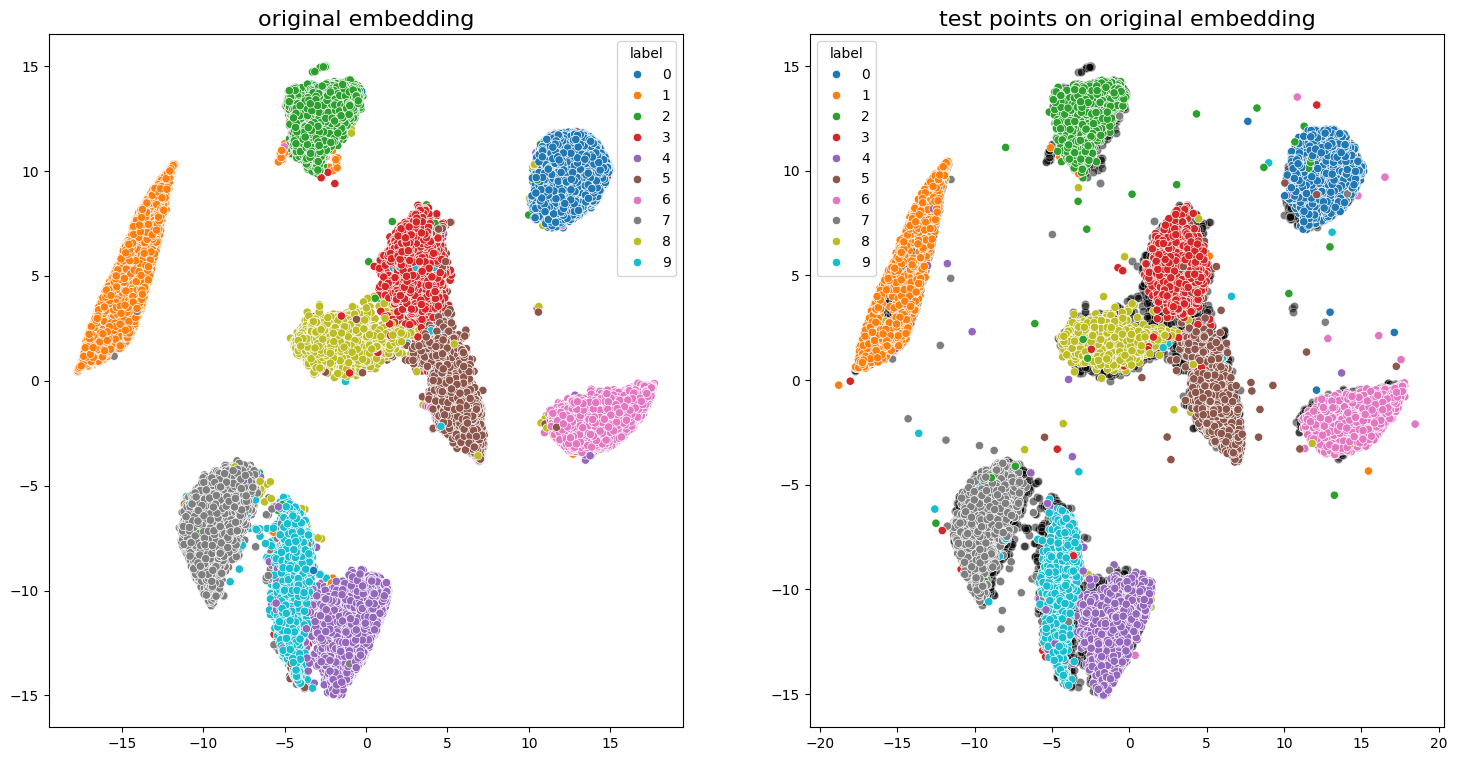

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr.label.astype(str),
                hue_order=np.unique(tr.label).astype(str), ax=ax[0]) # orig
ax[0].set_title('original embedding', fontsize=16)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], color='black', alpha=0.5, ax=ax[1])
sns.scatterplot(x=tst_embedding[:, 0], y=tst_embedding[:, 1], hue=tst.label.astype(str),
                hue_order=np.unique(tst.label).astype(str), ax=ax[1])
ax[1].set_title('test points on original embedding', fontsize=16)

plt.show()

## 1.2 Flexible usage

- [утяжеляем хвосты, чтобы увидить более тонкую структуру кластеров](https://arxiv.org/pdf/1902.05804)
- [интересные инсайты на тему learning_rate](https://sci-hub.ru/10.1038/s41467-019-13055-y)

===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 6.9365, 50 iterations in 1.5448 sec
Iteration  100, KL divergence 6.6759, 50 iterations in 1.6535 sec
Iteration  150, KL divergence 6.5696, 50 iterations in 1.5608 sec
Iteration  200, KL divergence 6.5060, 50 iterations in 1.5408 sec
Iteration  250, KL divergence 6.4615, 50 iterations in 1.5807 sec
   --> Time elapsed: 7.88 seconds
===> Running optimization with exaggeration=4.00, lr=15000.00 for 500 iterations...
Iteration   50, KL divergence 6.2214, 50 iterations in 1.5540 sec
Iteration  100, KL divergence 6.1278, 50 iterations in 1.6455 sec
Iteration  150, KL divergence 6.0668, 50 iterations in 1.5379 sec
Iteration  200, KL divergence 6.0215, 50 iterations in 1.4771 sec
Iteration  250, KL divergence 5.9852, 50 iterations in 1.4840 sec
Iteration  300, KL divergence 5.9552, 50 iterations in 1.5398 sec
Iteration  350, KL divergence 5.9297, 50 iterations in 1.5080 sec
Iterat

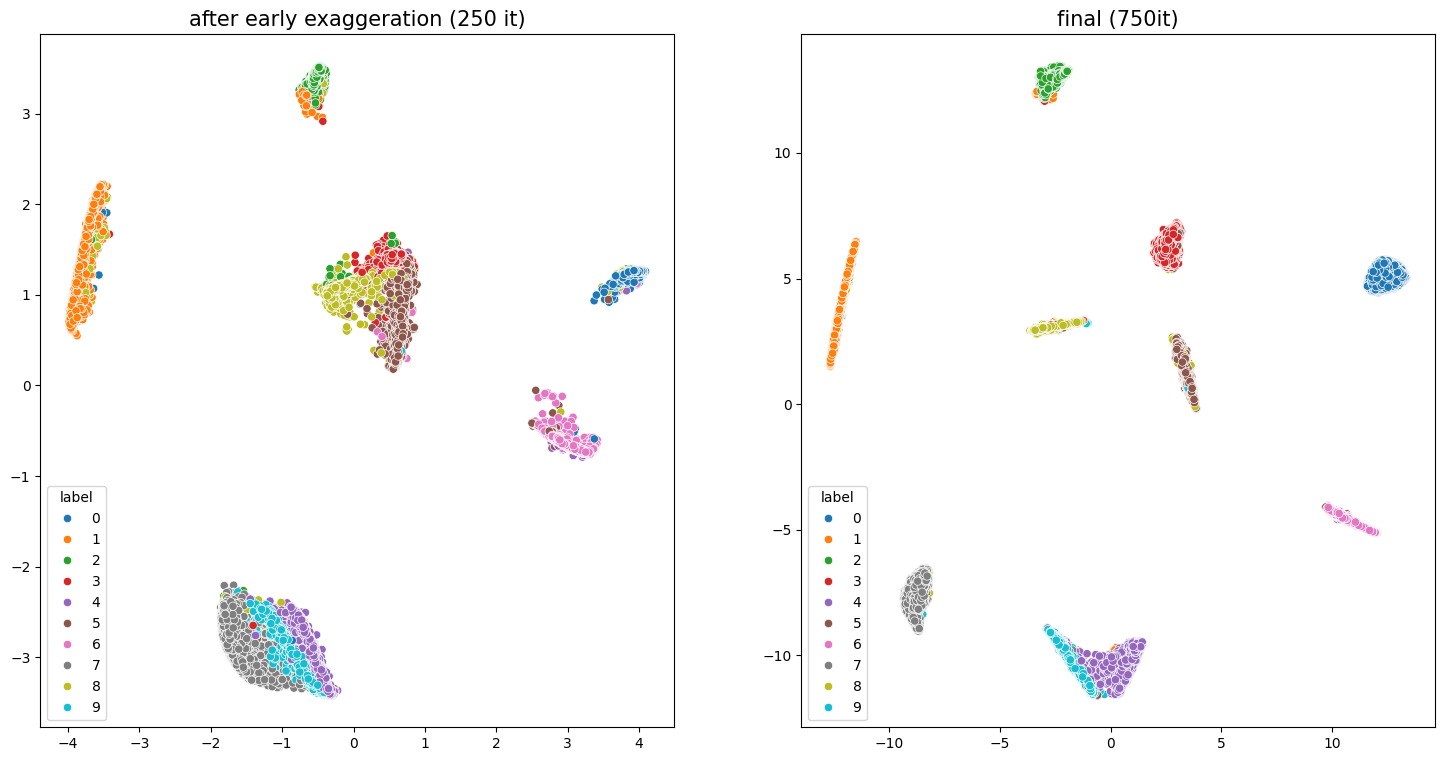

CPU times: total: 5min 23s
Wall time: 42.3 s


In [9]:
%%time
import openTSNE

init = openTSNE.initialization.pca(X_tr, random_state=911)
# openTSNE.initialization.rescale(init, target_std=0.0001, inplace=True) # родные можно не скейлить, там скейлинг вшит

affinities = openTSNE.affinity.PerplexityBasedNN(X_tr, perplexity=30, metric='cosine', method='hnsw', n_jobs=8, random_state=911)

embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    dof=0.3, # <----------
    n_jobs=8,
    verbose=True,
    optimizer=None
)


fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# EARLY EXAGGERATION
embedding = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr.label.astype(str),
                hue_order=np.unique(tr.label).astype(str), ax=ax[0])
ax[0].set_title('after early exaggeration (250 it)', fontsize=15)

# BASIC EXAGGERATION
embedding = embedding.optimize(n_iter=500, exaggeration=4, momentum=0.5)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=tr.label.astype(str),
                hue_order=np.unique(tr.label).astype(str), ax=ax[1])
ax[1].set_title('final (750it)', fontsize=15)

plt.show()

## 2. Применение линейных моделей на плоскости

In [10]:
%%time

from lightning.classification import SGDClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

# применение SVM в оригинальном пространстве
model = SGDClassifier(loss='log', multiclass=True)
scaler = StandardScaler()
X_tr_norm = scaler.fit_transform(X_tr)
model.fit(X_tr_norm, tr.label.values)

X_tst_norm = scaler.transform(X_tst)
predicted_labels = model.predict(X_tst_norm)

balanced_accuracy_score(tst.label, predicted_labels)

CPU times: total: 4.5 s
Wall time: 4.55 s


0.9026200783531392

In [11]:
%%time

# применение SVM на плоскости
model = SGDClassifier(loss='log', multiclass=True)
model.fit(embedding, tr.label.values)

embedding_tst = embedding.transform(X_tst)
predicted_labels = model.predict(embedding_tst)

balanced_accuracy_score(tst.label, predicted_labels)

===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 175092.1251, 50 iterations in 0.1046 sec
Iteration  100, KL divergence 175085.9505, 50 iterations in 0.1186 sec
Iteration  150, KL divergence 175082.7074, 50 iterations in 0.1116 sec
Iteration  200, KL divergence 175080.5421, 50 iterations in 0.1166 sec
Iteration  250, KL divergence 175078.2880, 50 iterations in 0.1196 sec
   --> Time elapsed: 0.57 seconds
CPU times: total: 8.19 s
Wall time: 1.45 s


0.9626306603775113

predict time: 0.007 sec. | grid shape: (168857, 2)


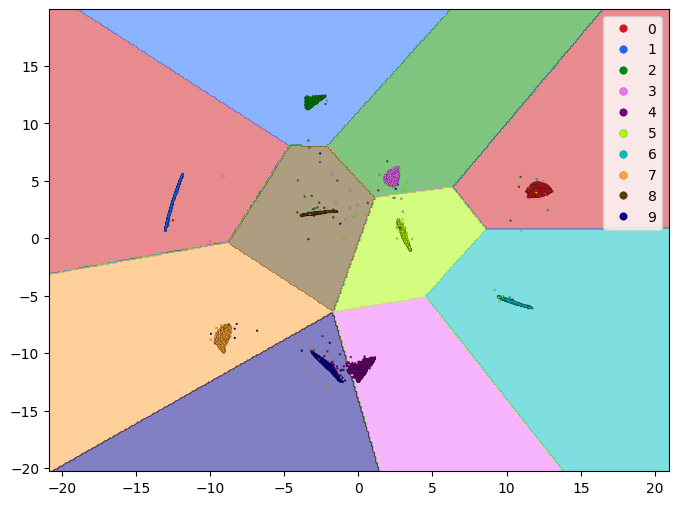

In [12]:
from my_utils import plot_classification    
    
plot_classification(model, embedding_tst, hue=tst.label, figsize=(8, 6), mesh_h=0.1)  

[Вишенка!](https://sci-hub.ru/10.1038/s41467-019-13056-x)

# UMAP

библиотека: [UMAP](https://github.com/lmcinnes/umap)

In [13]:
#!pip install --upgrade numba pynndescent umap-learn umap-learn[plot]

## 1. Hello-world

In [21]:
%%time
import umap

mapper = umap.UMAP(
    n_neighbors=30,
    min_dist=0.001,
    # a=1,
    # b=0.5,
    metric='cosine',
    n_jobs=-1, # иногда оно валится, тогда используйте njobs=1
    verbose=True,
).fit(X_tr) # returns umap_object

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.001, n_neighbors=30, verbose=True)
Wed Dec  4 22:13:10 2024 Construct fuzzy simplicial set
Wed Dec  4 22:13:11 2024 Finding Nearest Neighbors
Wed Dec  4 22:13:11 2024 Building RP forest with 17 trees
Wed Dec  4 22:13:12 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Wed Dec  4 22:13:14 2024 Finished Nearest Neighbor Search
Wed Dec  4 22:13:14 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec  4 22:13:21 2024 Finished embedding
CPU times: total: 2min 16s
Wall time: 11.4 s


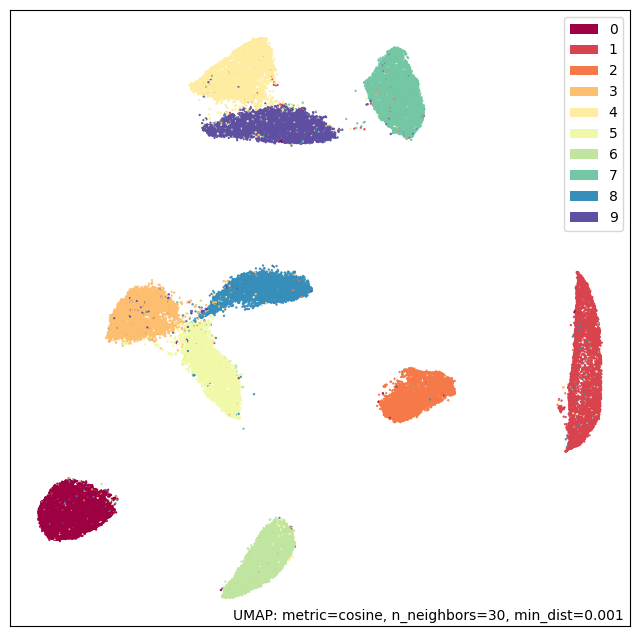

In [22]:
import umap.plot as uplot

uplot.points(mapper, labels=tr.label)
plt.show()

Wed Dec  4 22:13:24 2024 Worst tree score: 0.77695000
Wed Dec  4 22:13:24 2024 Mean tree score: 0.78380098
Wed Dec  4 22:13:24 2024 Best tree score: 0.79458333
Wed Dec  4 22:13:24 2024 Forward diversification reduced edges from 1800000 to 449213
Wed Dec  4 22:13:24 2024 Reverse diversification reduced edges from 449213 to 449213
Wed Dec  4 22:13:24 2024 Degree pruning reduced edges from 515068 to 515068
Wed Dec  4 22:13:24 2024 Resorting data and graph based on tree order
Wed Dec  4 22:13:24 2024 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
CPU times: total: 17.2 s
Wall time: 6.37 s


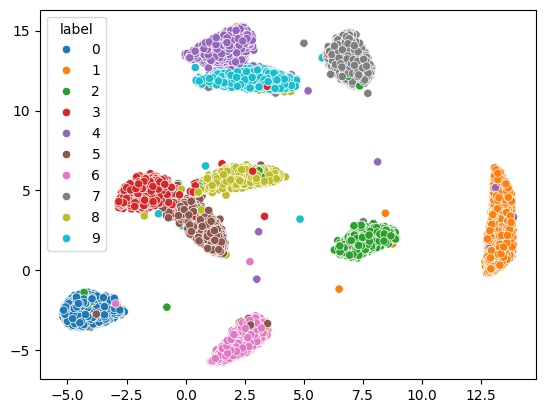

In [23]:
%time embedding_tst = mapper.transform(X_tst) # returns embedding

sns.scatterplot(x=embedding_tst[:, 0], y=embedding_tst[:, 1], hue=tst.label.astype(str),
                hue_order=np.unique(tst.label).astype(str))
plt.show()

## 2. Semi-supervised learning

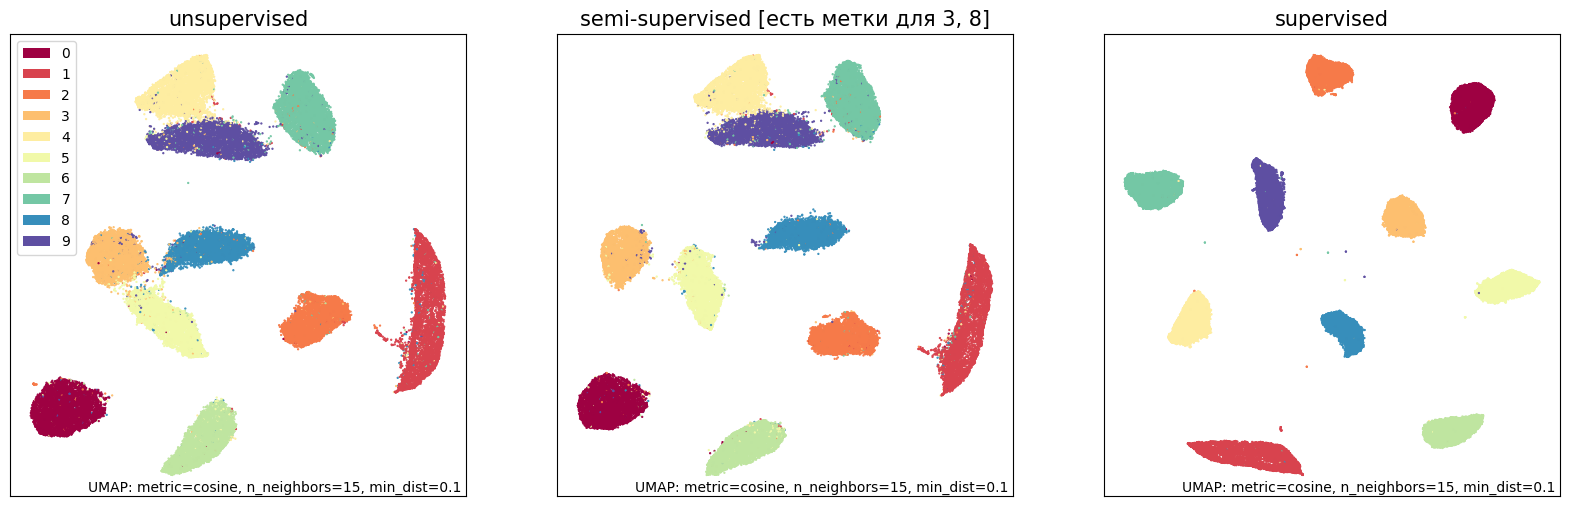

In [24]:
mapper_unsupervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=-1,
).fit(tr)

semi_labels = tr.label.copy()
semi_labels[~np.isin(semi_labels, [3, 8])] = -1
mapper_semi_supervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=-1,
).fit(tr, y=semi_labels) # <-----

mapper_supervised = umap.UMAP(
    n_neighbors=15,
    metric='cosine',
    n_jobs=-1,
).fit(tr, y=tr.label) # <-----


fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].set_title('unsupervised', fontsize=15)
ax[1].set_title('semi-supervised [есть метки для 3, 8]', fontsize=15)
ax[2].set_title('supervised', fontsize=15)

uplot.points(mapper_unsupervised, labels=tr.label, ax=ax[0])
uplot.points(mapper_semi_supervised, labels=tr.label, ax=ax[1], show_legend=False)
uplot.points(mapper_supervised, labels=tr.label, ax=ax[2], show_legend=False)

plt.show()

supervised transform

CPU times: total: 12.9 s
Wall time: 4.62 s


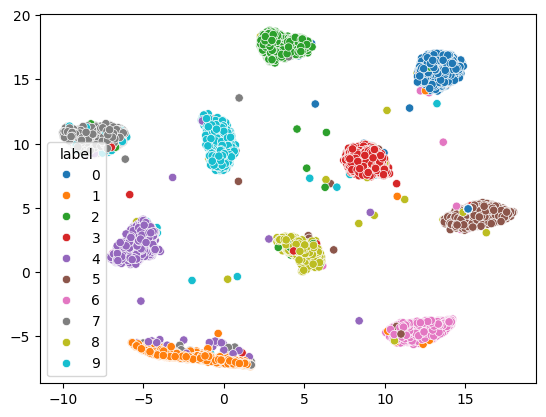

In [25]:
mapper_supervised.njobs = 1
%time embedding_tst = mapper_supervised.transform(X_tst) # returns embedding

sns.scatterplot(x=embedding_tst[:, 0], y=embedding_tst[:, 1], hue=tst.label.astype(str),
                hue_order=np.unique(tst.label).astype(str))
plt.show()

## 3. umap.plot

**`plot_interactive`**

In [26]:
umap.plot.output_notebook()

hover_data = pd.DataFrame({'digit': tr.label, 'digit**2': tr.label ** 2}).astype(str)
p = umap.plot.interactive(mapper, labels=tr.label.astype(str), hover_data=hover_data, point_size=2)
umap.plot.show(p)

Loading BokehJS ...

**`plot_diagnostic`**

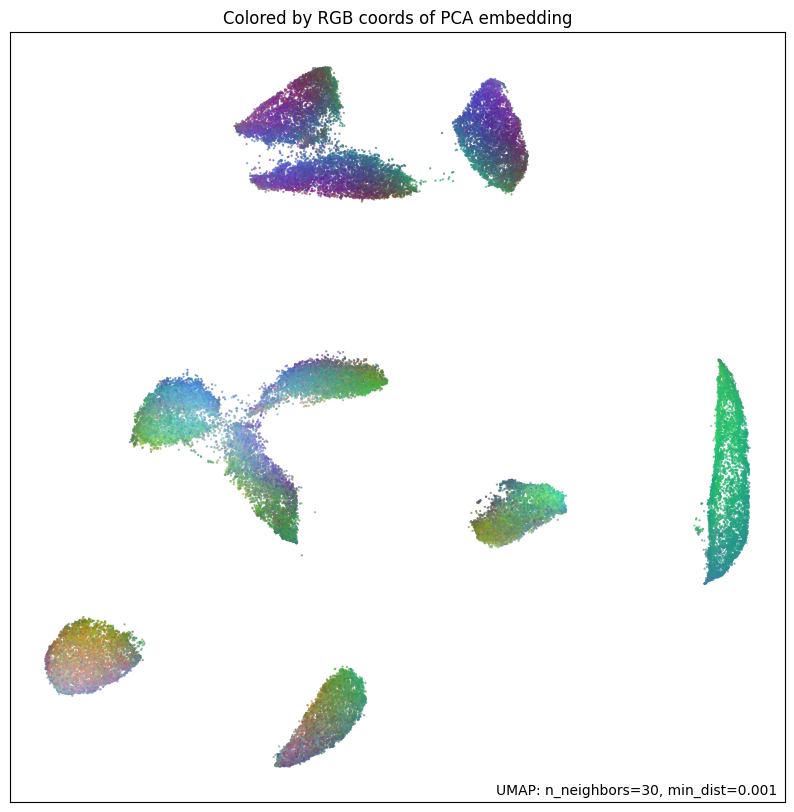

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

umap.plot.diagnostic(mapper, diagnostic_type='pca', ax=ax)
plt.show()

## 4. Остальное

Читайте в документации про:
- [densMAP](https://www.biorxiv.org/content/10.1101/2020.05.12.077776v1.full.pdf) (VPN)
- AlignedUMAP
- parametric UMAP
- inverse transforms

# Итог

- если у вас есть мера близости между объектами, вы очень сильные!
- нужно уметь пользоваться обоими методами
- нужно рисовать несколько визуализаций с разными параметрами, чтобы получить как можно больше информации
- [GPU-ускорение t-SNE и UMAP](https://github.com/rapidsai/cuml)
- [много хороших слов и интерактивное сравнение](https://pair-code.github.io/understanding-umap/)


t-SNE:
- сжатие только в 2D / 3D
- много улучшений и возможностей наплодить графиков существенно разной топологии
- почти все прозрачно и понятно как устроено

UMAP:
- математически оправданный алгоритм
- сжатие в любую размерность
- скорость (?)
- semi-supervised learning (круто!.. но не понятно)
- не все понятно как устроено и нигде не написано (нужно читать сурс код)
- классные возможности рисовалки
- неплохие фишки (см. п. 4)